In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Understanding the OOB score

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
oob_errors = []
n_trees_range = range(1, 50)

for n_trees in n_trees_range:
    rf_classifier = RandomForestClassifier(n_estimators=n_trees,
                                           oob_score=True,
                                           random_state=42
                                           )

    rf_classifier.fit(X, y)

    oob_error = 1 - rf_classifier.oob_score_
    oob_errors.append(oob_error)

/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/abughdaryan/miniconda3/envs/torch/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/abughdaryan/miniconda

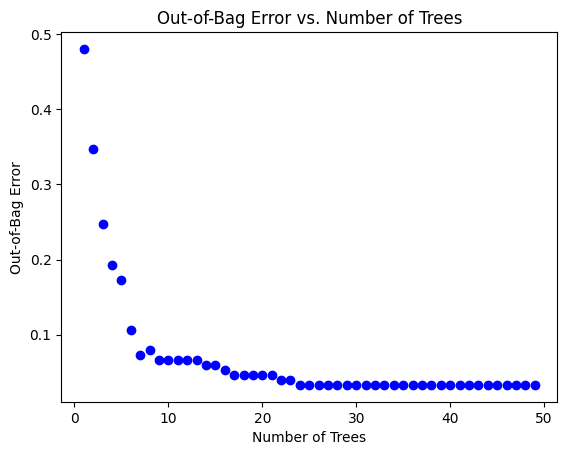

In [4]:
plt.plot(n_trees_range, oob_errors, 'bo')
plt.xlabel("Number of Trees")
plt.ylabel("Out-of-Bag Error")
plt.title("Out-of-Bag Error vs. Number of Trees")
plt.show()

# Adult dataset

In [12]:
!curl https://archive.ics.uci.edu/static/public/2/adult.zip -o adult.zip
!unzip adult.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  605k    0  605k    0     0  19770      0 --:--:--  0:00:31 --:--:-- 185970 --:--:--  0:00:09 --:--:--     0
Archive:  adult.zip
  inflating: Index                   
  inflating: adult.data              
  inflating: adult.names             
  inflating: adult.test              
  inflating: old.adult.names         


In [6]:
data = pd.read_csv('adult.data', header=None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1",
                "education", "marital_status","occupation",
                "relationship", "race", "sex", "capital_gain",
                "capital_loss", "hours_per_week", "country", "income"]

data.head()

,age,workclass,not_needed1,education1,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data

,age,workclass,not_needed1,education1,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.isna().sum()

age                  0
workclass         1836
not_needed1          0
education1           0
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
country            583
income               0
dtype: int64

# Data Processing

## Remove the missing values

In [9]:
# removes the rows with missing values
data.dropna(inplace=True)

In [10]:
data.isna().sum()

age               0
workclass         0
not_needed1       0
education1        0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   not_needed1     30162 non-null  int64 
 3   education1      30162 non-null  object
 4   education       30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  country         30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


For simplicity, we will skip some of the features.

In [12]:
data.head()

,age,workclass,not_needed1,education1,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
data.drop(["not_needed1", "education1",
           "relationship", "capital_gain",
           "capital_loss", "country"], axis = 1, inplace = True)

In [14]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [16]:
print(y_train.value_counts())
print(y_test.value_counts())

income
<=50K    18122
>50K      6007
Name: count, dtype: int64
income
<=50K    4532
>50K     1501
Name: count, dtype: int64


In [17]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,<=50K


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot',
         OneHotEncoder(handle_unknown='ignore'),
         ["workclass", "marital_status", "occupation", "race", "sex"])
    ])

preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize the ensemble models


In [19]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=100,
                                  random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100,
                                             random_state=42)

weighted_voting_model = VotingClassifier(
    estimators=[('bagging', bagging_model),
                ('random_forest', random_forest_model)],
    voting='soft')

base_models = [('bagging', bagging_model),
               ('random_forest', random_forest_model)]
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=DecisionTreeClassifier())


In [20]:
# Train the models
bagging_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
weighted_voting_model.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)

# Evaluate the models
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
weighted_voting_pred = weighted_voting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

# Calculate and print the accuracy for each model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
weighted_voting_accuracy = accuracy_score(y_test, weighted_voting_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Weighted Voting Accuracy:", weighted_voting_accuracy)
print("Stacking Accuracy:", stacking_accuracy)

Bagging Accuracy: 0.8145201392342118
Random Forest Accuracy: 0.814685894248301
Weighted Voting Accuracy: 0.8143543842201226
Stacking Accuracy: 0.7807061163600199


# Handling Class Imbalance

## SMOTE (Synthetic Minority Over-sampling Technique)

In [22]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [23]:
X_train.shape

(24129, 35)

In [24]:
X_resampled.shape

(36244, 35)

In [25]:
# Train the models
bagging_model.fit(X_resampled, y_resampled)
random_forest_model.fit(X_resampled, y_resampled)
weighted_voting_model.fit(X_resampled, y_resampled)
stacking_model.fit(X_resampled, y_resampled)

# Evaluate the models
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
weighted_voting_pred = weighted_voting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

# Calculate and print the accuracy for each model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
weighted_voting_accuracy = accuracy_score(y_test, weighted_voting_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Weighted Voting Accuracy:", weighted_voting_accuracy)
print("Stacking Accuracy:", stacking_accuracy)

Bagging Accuracy: 0.7656224100779049
Random Forest Accuracy: 0.7659539201060832
Weighted Voting Accuracy: 0.7661196751201724
Stacking Accuracy: 0.7457318083872038


## Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply Random Oversampling to your training data
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [27]:
# Train the models
bagging_model.fit(X_resampled, y_resampled)
random_forest_model.fit(X_resampled, y_resampled)
weighted_voting_model.fit(X_resampled, y_resampled)
stacking_model.fit(X_resampled, y_resampled)

# Evaluate the models
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
weighted_voting_pred = weighted_voting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

# Calculate and print the accuracy for each model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
weighted_voting_accuracy = accuracy_score(y_test, weighted_voting_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Weighted Voting Accuracy:", weighted_voting_accuracy)
print("Stacking Accuracy:", stacking_accuracy)

Bagging Accuracy: 0.756340129288911
Random Forest Accuracy: 0.7571689043593569
Weighted Voting Accuracy: 0.7568373943311785
Stacking Accuracy: 0.7260069617105918


## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply Random Oversampling to your training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
# Train the models
bagging_model.fit(X_resampled, y_resampled)
random_forest_model.fit(X_resampled, y_resampled)
weighted_voting_model.fit(X_resampled, y_resampled)
stacking_model.fit(X_resampled, y_resampled)

# Evaluate the models
bagging_pred = bagging_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)
weighted_voting_pred = weighted_voting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

# Calculate and print the accuracy for each model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
weighted_voting_accuracy = accuracy_score(y_test, weighted_voting_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

print("Bagging Accuracy:", bagging_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Weighted Voting Accuracy:", weighted_voting_accuracy)
print("Stacking Accuracy:", stacking_accuracy)

# HW3

Try to beat the above scores at home when doing the **HW3**.